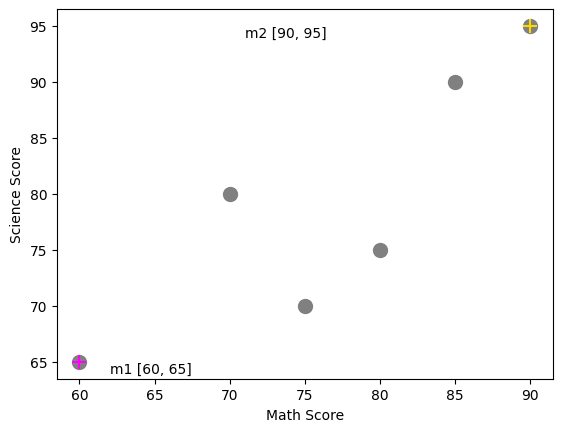

In [73]:
import matplotlib.pyplot as plt

# raw data
data = [[80,75,-1], [70,80,-1], [90, 95,-1], [85,90,-1],[60,65,-1],[75,70,-1]]
# split raw data list into x and y lists
x = [point[0] for point in data]
y = [point[1] for point in data]
c = [point[2] for point in data]

# initiate centroids (x,y,c)
m1 = [60, 65, 1]
m2 = [90, 95, 2]

# plot scores
plt.xlabel('Math Score')
plt.ylabel('Science Score')
plt.scatter(x, y, c='grey', s=100, )

# plot initial centroids
plt.scatter(m1[0], m1[1], c='magenta', s=100, marker='+')
plt.annotate(f'm1 [{m1[0]}, {m1[1]}]', (m1[0], m1[1]), xytext=(m1[0] + 2, m1[1] - 1))
plt.scatter(m2[0], m2[1], c='gold', s=100, marker='+')
plt.annotate(f'm2 [{m2[0]}, {m2[1]}]', (m2[0], m2[1]), xytext=(m2[0] - 19, m2[1] - 1))

plt.show()


iteration 0 input
class 1 points (x, y, class): []
class 2 points (x, y, class): []
centroid 1 (x, y, class): [60, 65, 1]
centroid 2 (x, y, class): [90, 95, 2]

iteration 0 output
class 1 points (x, y, class): [[80, 75, 1], [70, 80, 1], [60, 65, 1], [75, 70, 1]]
class 2 points (x, y, class): [[90, 95, 2], [85, 90, 2]]
centroid 1 (x, y, class): [71.25, 72.5, 1]
centroid 2 (x, y, class): [87.5, 92.5, 2]

iteration 1 input
class 1 points (x, y, class): [[80, 75, 1], [70, 80, 1], [60, 65, 1], [75, 70, 1]]
class 2 points (x, y, class): [[90, 95, 2], [85, 90, 2]]
centroid 1 (x, y, class): [71.25, 72.5, 1]
centroid 2 (x, y, class): [87.5, 92.5, 2]

iteration 1 output
class 1 points (x, y, class): [[80, 75, 1], [70, 80, 1], [60, 65, 1], [75, 70, 1]]
class 2 points (x, y, class): [[90, 95, 2], [85, 90, 2]]
centroid 1 (x, y, class): [71.25, 72.5, 1]
centroid 2 (x, y, class): [87.5, 92.5, 2]

final data
class 1 points (x, y, class): [[80, 75, 1], [70, 80, 1], [60, 65, 1], [75, 70, 1]]
class 2 po

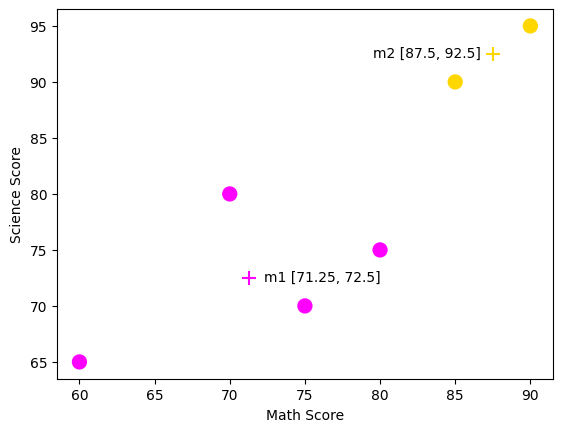

In [ ]:
def assign_class(data):
  for point in data:
    # initialize index var for class assignment
    index = data.index(point)

    # initialize point coordinates and centroid coordinates for Euclidean distance calculation
    point_x = point[0]
    point_y = point[1]

    m1_x = m1[0]
    m1_y = m1[1]

    m2_x = m2[0]
    m2_y = m2[1]

    # calculate Euclidean distance from point to each centroid
    m1_dist = ((point_x - m1_x)**2 + (point_y - m1_y)**2)**0.5
    m2_dist = ((point_x - m2_x)**2 + (point_y - m2_y)**2)**0.5
    
    # list of distances from point to centroids
    centroid_distances = [m1_dist, m2_dist]
    # shortest distance to a centroid
    min_distance = min(centroid_distances)
    # assign point a class based on nearest centroid
    c_point = 1 + centroid_distances.index(min_distance)
    
    # assign class label to c list
    data[index][2] = c_point

  # create point lists for each class
  c1 = [point for point in data if point[2] == 1]
  c2 = [point for point in data if point[2] == 2]

  # return classified point lists
  return([c1,c2])

def update_centroid(points, centroid):
  # initialize x and y summing vars
  sum_x = 0
  sum_y = 0

  # sum x and y values for points in class list
  for point in points:
    sum_x += point[0]
    sum_y += point[1]
  
  # calculate x and y for new centroid
  mean_x = sum_x / len(points)
  mean_y = sum_y / len(points)

  # update centroid x and y values
  centroid[0] = mean_x
  centroid[1] = mean_y

def knn_cluster(data, centroids, iterations):
  # counter var
  iteration = 0

  # initialize centroid and classified point list vars
  m1 = centroids[0]
  m2 = centroids[1]
  c1 = []
  c2 = []

  # cluster and update centroids for specified number of iterations
  while iteration < iterations:
    # print input classified points and centroids
    print(f'\niteration {iteration} input')
    print(f'class 1 points (x, y, class): {c1}')
    print(f'class 2 points (x, y, class): {c2}')
    print(f'centroid 1 (x, y, class): {m1}')
    print(f'centroid 2 (x, y, class): {m2}')

    # assign classes to points
    c1, c2 = assign_class(data)

    # update centroids with newly assigned points
    update_centroid(c1, m1)
    update_centroid(c2, m2)

    # print output classified points and centroids
    print(f'\niteration {iteration} output')
    print(f'class 1 points (x, y, class): {c1}')
    print(f'class 2 points (x, y, class): {c2}')
    print(f'centroid 1 (x, y, class): {m1}')
    print(f'centroid 2 (x, y, class): {m2}')
    print('====================================')

    # iterate counter var
    iteration += 1

  # return labeled data points, class lists, and centroids
  return (data, c1, c2, m1, m2)

# perform KNN clustering on raw data and assign final data variables
clustered_data, c1, c2, m1, m2 = knn_cluster(data, [m1, m2], 2)

# print final data
print('\nfinal data')
print(f'class 1 points (x, y, class): {c1}')
print(f'class 2 points (x, y, class): {c2}')
print(f'centroid 1 (x, y, class): {m1}')
print(f'centroid 2 (x, y, class): {m2}')

# split labeled data list into x and y lists
x = [point[0] for point in clustered_data]
y = [point[1] for point in data]
# create cmap
color_dict = {1: 'magenta', 2: 'gold'}
colors = [color_dict[point[2]] for point in clustered_data]

# plot labeled scores
plt.xlabel('Math Score')
plt.ylabel('Science Score')
plt.scatter(x, y, c=colors, s=100, )

# plot final centroids
plt.scatter(m1[0], m1[1], c='magenta', s=100, marker='+')
plt.annotate(f'm1 [{m1[0]}, {m1[1]}]', (m1[0], m1[1]), xytext=(m1[0] + 1, m1[1] - 0.25))
plt.scatter(m2[0], m2[1], c='gold', s=100, marker='+')
plt.annotate(f'm2 [{m2[0]}, {m2[1]}]', (m2[0], m2[1]), xytext=(m2[0] - 8, m2[1] - 0.25))

plt.show()